In [23]:
import pandas as pd
app_with_duplicates = pd.read_csv('C:\\Users\\Priyanshu\\Downloads\\apps.csv\\apps.csv')


In [25]:
apps = app_with_duplicates.drop_duplicates()

In [27]:
print('Total number of apps in the dataset = ',apps['App'].count())

Total number of apps in the dataset =  9659


In [28]:
n=5
apps.sample(n)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5296,6301,Bingo Party - Free Bingo Games,GAME,4.7,155694,92M,"1,000,000+",Free,0,Teen,Board,"July 13, 2018",2.1.1,4.0.3 and up
9219,10391,Police VAZ LADA Simulator,FAMILY,3.6,3502,61M,"500,000+",Free,0,Teen,Simulation,"September 11, 2016",1.3,2.3 and up
6024,7066,Sniper Gun Shot 3D: Impossible Missions,GAME,4.6,20,34M,100+,Free,0,Mature 17+,Action,"May 4, 2018",1.0,4.0 and up
2175,2785,Find&Save - Local Shopping,SHOPPING,4.0,4602,6.2M,"500,000+",Free,0,Everyone,Shopping,"December 22, 2017",3.0.0,4.1 and up
6794,7853,Smokes Guide for CS:GO,FAMILY,4.3,445,29M,"50,000+",Free,0,Everyone,Entertainment,"June 1, 2017",3.0,4.0 and up


In [31]:
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col]= apps[col].str.replace(char,'')

    apps[col]=pd.to_numeric(apps[col])    

In [34]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [35]:
num_categories = len(set(apps['Category'].value_counts().sort_values(ascending=False)))

In [37]:
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)


In [42]:
data=[go.Bar(
    x=num_apps_in_category.index,
    y=num_apps_in_category.values,
)]

plotly.offline.iplot(data)

In [43]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating',avg_app_rating)

Average app rating 4.173243045387994


In [44]:
data = [go.Histogram(
    x=apps['Rating'],
    xbins={'start':1,'size':0.1,'end':5}
)]

In [45]:
layout={'shapes': [{
    'type':'line',
    'x0':avg_app_rating,
    'y0':0,
    'x1':avg_app_rating,
    'y1':1000,
    'line':{'dash':'dashdot'}
}]}

plotly.offline.iplot({'data':data,'layout':layout})

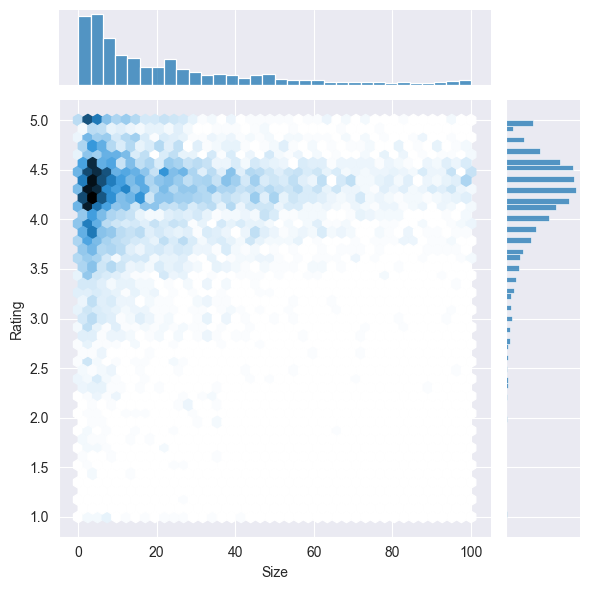

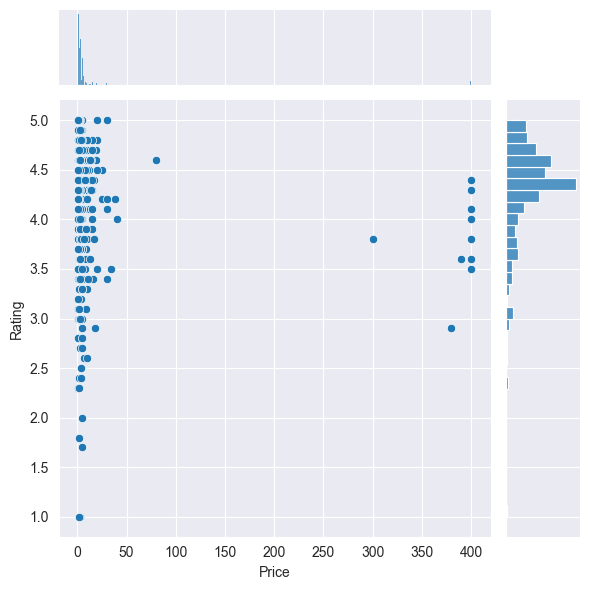

In [46]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()


plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')


paid_apps = apps[apps['Type'] == 'Paid']


plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


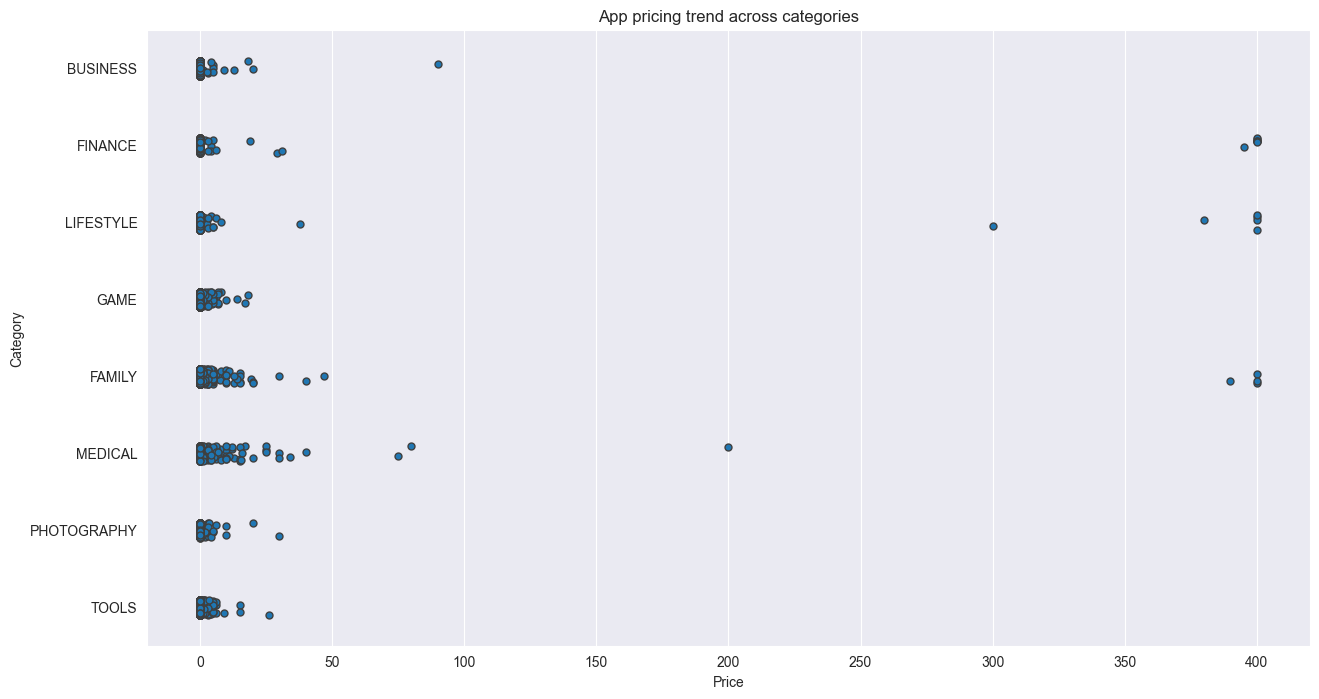

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]


ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')


apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

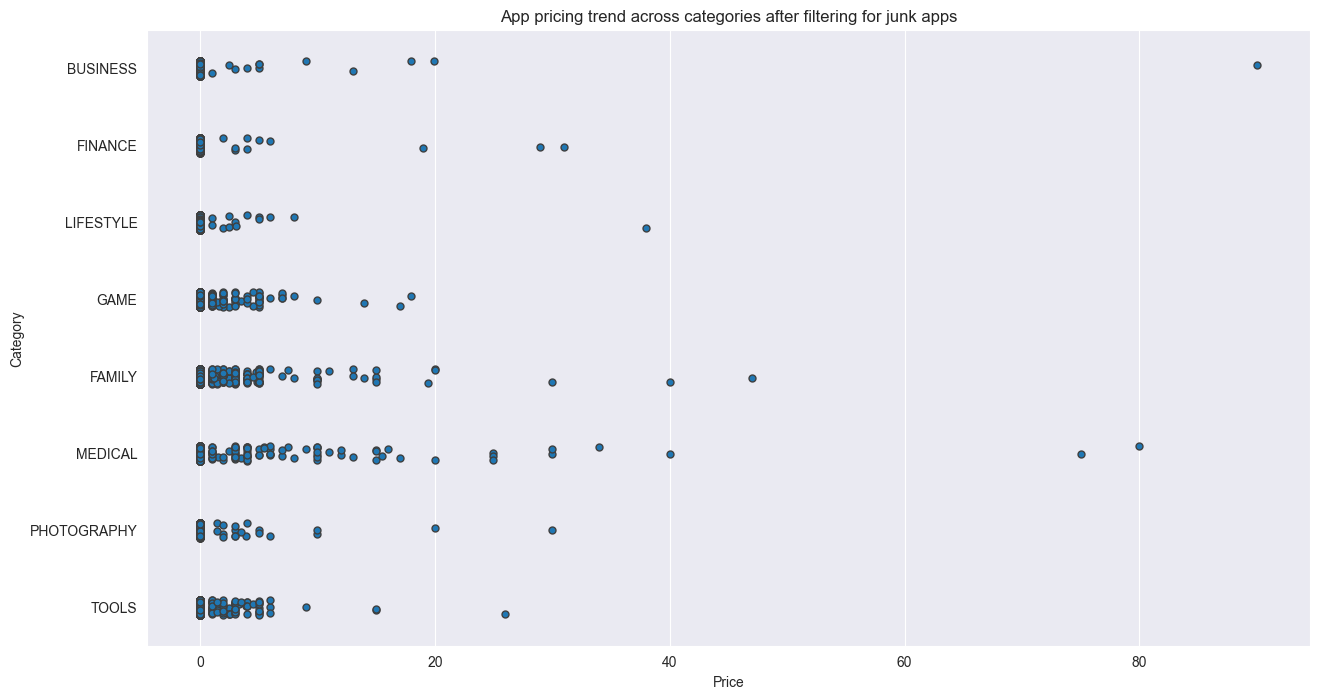

In [48]:

apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [49]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [52]:

reviews_df = pd.read_csv('C:\\Users\\Priyanshu\\Downloads\\apps.csv\\user_reviews.csv')




In [53]:
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")


In [54]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

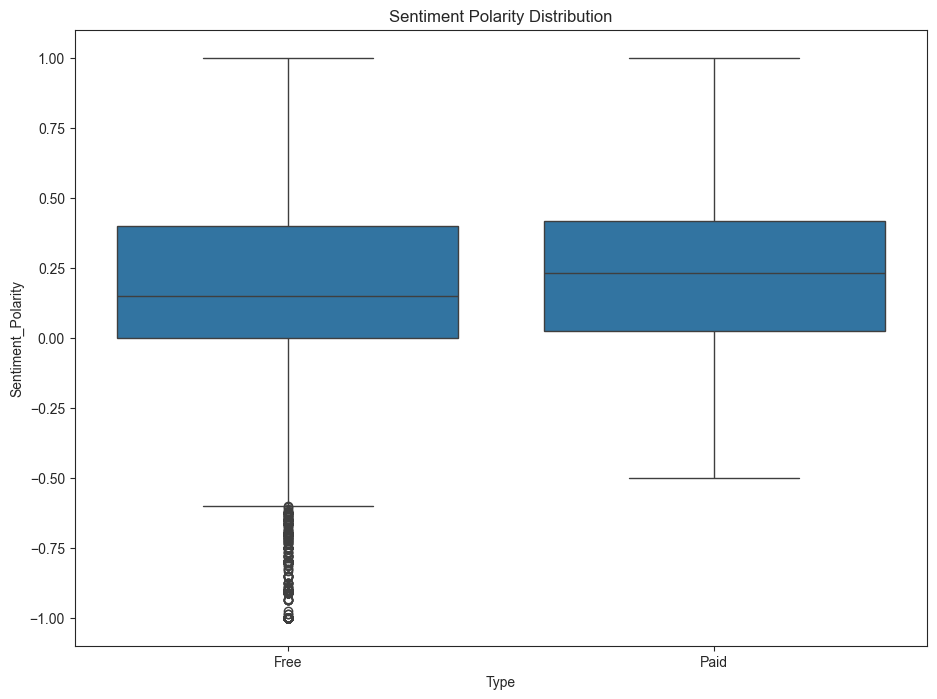

In [56]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')